# Q-Learning based RL agent

Requirements:
>Numpy

We're going to create two different environments for our QL agent 
> A pickup and delivery env 

> A maze env


In [1]:
import numpy as np
from random import randint, random, uniform

# The Pickup and Delivery environment

#### Actions:
0 : move up

1 : move down

2 : move left

3 : move right

4 : pick up

5 : deliver

reward for legal moves : -1

reward for trying to go off the boundary : -30

reward for trying to pickup a thing when it has already been picked up or if it was not in place : -10

reward for picking the item correctly : 50

reward for deliverying correctly : 50

reward for trying to deliver at the wrong place : -30

In [2]:
class PDE:
    
    def __init__(self,size,pickup,delivery,agent_position):
        self.size = size
        self.pickup = pickup
        self.delivery = delivery
        self.position = agent_position
        
        self.item_picked_up = False 
        
    def number_of_states_possible(self):
        return self.size**4 * 2
    
    def state(self):
        states = self.position[0]* self.size ** 3 * 2
        states += self.position[1]* self.size ** 2 * 2
        states += self.pickup[0]* self.size** 1 * 2
        states += self.pickup[1]* 2

        if self.item_picked_up:
            states += 1
        return states
        
    
    def act(self,action):
        (x,y) = self.position
        
        if action == 0:  # go up
            if y == 0 : 
                return -30 , False 
            else :
                self.position = (x,y-1)
                return -1, False
            
        elif action == 1:  # go down
            if y == self.size -1 :
                return -30 , False 
            else :
                self.position = (x,y+1)
                return -1 , False
            
        elif action == 2:  # go left
            if x == 0:
                return -30 , False 
            else : 
                self.position = (x-1,y)
                return -1, False 
             
        elif action == 3:  # go right
            if x == self.size -1:
                return -30, False 
            else :
                self.position = (x+1,y)
                return -1 , False 
            
        elif action == 4 :  # pickup item
            if self.item_picked_up:
                return -10 , False 
            elif (x,y) != self.pickup:
                return -10, False 
            else:
                self.item_picked_up = True
                return 50, False 
            
        else : # deliver item
            if self.item_picked_up and self.position == self.delivery:
                return 50 , True
            elif self.item_picked_up and self.position != self.delivery:
                self.pickup = (x,y)
                self.item_picked_up = False
                return -30 , False 
            else:
                return -30, False 
            
            
    
    def naive_solution_to_test_actions(self):
        done = False 
        steps = 0 
        while not done:
            reward , done = self.act(randint(0,5))
            steps += 1
        return steps

In [3]:
env = PDE(10,(0,0),(9,9),(9,0))

In [4]:
env.naive_solution_to_test_actions()

171900

# There can be different states in the env
What are the states variables here?? 
> the start , the end , item_picked_up , the agent position

In [5]:
print(env.state())

19957


In [6]:
env.number_of_states_possible()

20000

#### Algorithm
- Initialise the **Q-table** to all zeros
- Iterate
    - Agent is in state **state**.
    - With probability **epsilon** choose to **explore**, else **exploit**.
        - If **explore**, then choose a *random* **action**.
        - If **exploit**, then choose the *best* **action** based on the current **Q-table**.
    - Update the **Q-table** from the new **reward** to the previous state.
    - Q[**state, action**] = (1 – **alpha**) * Q[**state, action**] + **alpha** * (**reward + gamma** * max(Q[**new_state**]) — Q[**state, action**])

# Rough implementation of qlearning algo

In [7]:
env = env

In [8]:
epsilon = 0.1 
gamma = 0.6
alpha = 0.1

In [9]:
ns = env.number_of_states_possible()
na = 6 

qtable = np.zeros((ns,na))

for i in range(100):
    
    env = PDE(10,(0,0),(9,9),(9,0))
    done = False
    steps = 0 
    while not done:
        state = env.state()
        if uniform(0,1) < epsilon:
            action = randint(0,5)
        else:
            action = np.argmax(qtable[state])

        # now that the action is set , act
        reward , done = env.act(action)

        # get the new state after action is done 
        new_state = env.state()

        # now comes the beast in all this. the equation

        qtable[state,action] = (1-alpha) * qtable[state,action] + alpha * (reward + (gamma * np.max(qtable[new_state]) )- qtable[state,action])
        
        steps += 1

# Implementing the q_learnging function 

In [59]:
def q_learn(ns, na, size = 10 ,start = (0,6) ,end = (0,1) ,current_position = (0,4) , epsilon = 0.1 , alpha = 0.1, gamma = 0.99, epochs = 10,verbose =False):
    
    
    qtable = np.zeros((ns,na))
    
    steps = [] 
    
    for i in range(epochs):
        
        if verbose :
            if i % verbose == 0 :
                try :
                    print(f'epoch {i} : steps on episode {i} = {steps[-1]}')
                except:
                    pass
                
        
        # Create a new state every time 
        
        env = PDE(size,start,end,current_position)
        done = False 
        
        step = 0
        while not done:

            state = env.state()
            
            if uniform(0,1)< epsilon:
                action = randint(0,5)
            else:
                action = np.argmax(qtable[state])
            
                # now that the action is set , act
            reward , done = env.act(action)

            # get the new state after action is done 
            new_state = env.state()

            # now comes the beast in all this. the equation

            qtable[state,action] = (1-alpha) * qtable[state,action] + alpha * (reward + (gamma * np.max(qtable[new_state]) )- qtable[state,action])

            if done:
                step += 1
                steps.append(step)
            else:
                step += 1
                
    return steps, qtable


In [60]:
qtable

array([[ -4.64270541,   0.54295734,  -5.61318515,   0.78169278,
         24.78626898,  -6.67590379],
       [ -8.94990886,  -0.71262452, -11.18690108,  -0.7126783 ,
         -3.83068422,  -4.4509498 ],
       [ -3.        ,  -0.1       ,   0.        ,   0.        ,
          0.        ,   0.        ],
       ...,
       [ -0.1       ,  -3.        ,  -0.1       ,  -3.89832413,
         -1.        ,  31.3909368 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [61]:
training_on_10_epoch, qt = q_learn(env.number_of_states_possible(),6,verbose= 1)
training_on_10_epoch

epoch 1 : steps on episode 1 = 391
epoch 2 : steps on episode 2 = 213
epoch 3 : steps on episode 3 = 641
epoch 4 : steps on episode 4 = 398
epoch 5 : steps on episode 5 = 110
epoch 6 : steps on episode 6 = 665
epoch 7 : steps on episode 7 = 171
epoch 8 : steps on episode 8 = 303
epoch 9 : steps on episode 9 = 520


[391, 213, 641, 398, 110, 665, 171, 303, 520, 150]

In [62]:
print(sum(training_on_10_epoch) / 10)

356.2


In [74]:
# training the model for 10000 epochs or episodes
# training_on_10k_epoch,qtbl = q_learn(env.number_of_states_possible(),6,epochs=100000)

In [72]:
print(sum(training_on_10k_epoch)/100000)

11.11243


# Plotting the data obtained from the model

In [65]:
import matplotlib.pyplot as plt

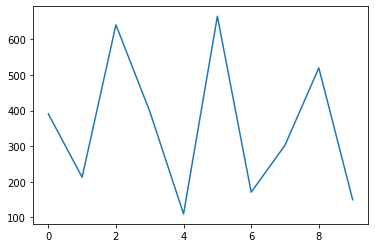

In [66]:
plt.plot(training_on_10_epoch)

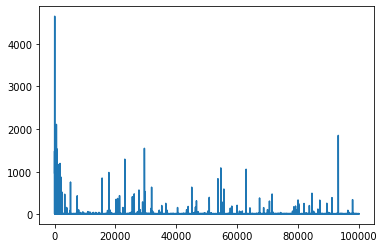

In [73]:
plt.plot(training_on_10k_epoch)

In [68]:


def save_model(qt,file='ql-model.dat'):
    import pickle as pil
    with open(file,'w') as file:
        file.write(pickle.dump(qt))
        return True
    
    
def load_model(file):
    try:
        with open(file,'rb+') as file:
            data = pil.load(file)
    except:
        raise "Error loading files"
    return data 


# trying the model on an unseen point data.

size = 6 

***ideal amount of steps =  8 ~ 10***

In [69]:
env1 = PDE(6,(4,2),(5,5),(5,0))
ns = env1.number_of_states_possible()
na = 6
print(env1.state(),'\ ',ns)

2212 \  2592


In [75]:
steps , qt = q_learn(ns,6,size = 6,start = (4,5) ,end=(5,5), current_position=(0,0),epochs = 10000)

In [76]:
print(sum(steps)/1000)

145.784


In [38]:
qt.shape

(2592, 6)

In [22]:
env1.naive_solution_to_test_actions()

20295

In [23]:
# for this problem, our model works ~ 980 % better than the naive solution to the problem

# Practical implementation on a new data point but in a board of the same dimensions as which the model was trained on.

In [79]:
def predict(qtable,size,start, end, current):
    
    done = False 
    step = 0
    env = PDE(size , start , end, current)
    
    
    for i in range (100):
        state = env.state()
        print(state ,' is the state')
        print(qtable[state])
        
        action = np.argmax(qtable[state ])
        print('doing ',action)
        
        print('done ',done,'\n')
                
        # now that the action is set , act
        reward , done = env.act(action)
        
        step += 1
        
    return step

        
        

In [81]:
predict(qt, 6,(4,5),(5,5),(0,0))

58  is the state
[-15.45665052  -0.9225263  -15.45665052  -0.9225263   -5.45665052
 -15.45665052]
doing  3
done  False 

490  is the state
[-13.33837223  -0.85358849  -0.94782094  -0.88083841  -5.29721635
 -12.80619575]
doing  5
done  False 

490  is the state
[-13.33837223  -0.85358849  -0.94782094  -0.88083841  -5.29721635
 -12.80619575]
doing  5
done  False 

490  is the state
[-13.33837223  -0.85358849  -0.94782094  -0.88083841  -5.29721635
 -12.80619575]
doing  5
done  False 

490  is the state
[-13.33837223  -0.85358849  -0.94782094  -0.88083841  -5.29721635
 -12.80619575]
doing  5
done  False 

490  is the state
[-13.33837223  -0.85358849  -0.94782094  -0.88083841  -5.29721635
 -12.80619575]
doing  5
done  False 

490  is the state
[-13.33837223  -0.85358849  -0.94782094  -0.88083841  -5.29721635
 -12.80619575]
doing  5
done  False 

490  is the state
[-13.33837223  -0.85358849  -0.94782094  -0.88083841  -5.29721635
 -12.80619575]
doing  5
done  False 

490  is the state
[-13.33

100

In [78]:
qt

array([[-3.        , -0.1       , -3.        , -0.1       , 23.44876753,
         0.        ],
       [-5.4       , -0.545111  , -3.        , -0.5317116 , -1.        ,
        -2.505     ],
       [-3.        ,  0.7100199 , -3.        , -0.1       , -1.        ,
        -3.        ],
       ...,
       [-0.1       , -3.        , -0.1       , -3.        , -0.10028202,
        20.43481278],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])